In [1]:
# Download the following customer dataset from below link:
# Data Set: https://www.kaggle.com/shwetabh123/mall-customers
# This dataset givesthe data of Income and money spent by the customers visiting a Shopping Mall.
# The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as
# a mall owner you need to find the group of people who are the profitable customers for the mall
# owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of
# customers.
# a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
# necessary.
# b. Perform data-preparation( Train-Test Split)
# c. Apply Machine Learning Algorithm
# d. Evaluate Model.
# e. Apply Cross-Validation and Evaluate Model

In [2]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=df.iloc[:,3:]      #all the rows and all the columns onwards 3

In [4]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Before Clustering 




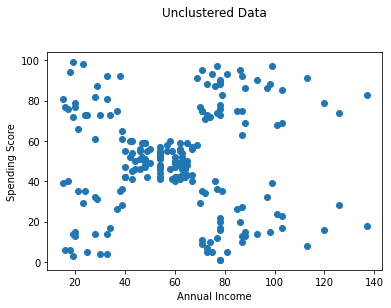

In [5]:
import matplotlib.pyplot as plt
print("Before Clustering \n\n")
plt.title("Unclustered Data\n\n")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"])

In [6]:
from sklearn.cluster import KMeans   #first Clustering Method  
from sklearn.cluster import AgglomerativeClustering  #Second Clustering Method  - hierarchical Clustering Method

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


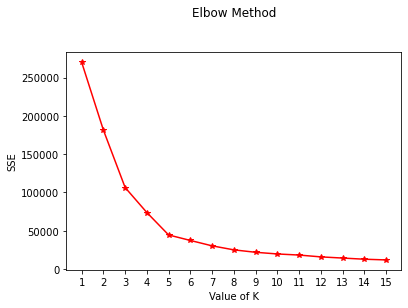

In [7]:
sse=[]                          # SSE means Sum squared Error
for k in range (1,16) :
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)
    
    
plt.title("Elbow Method\n\n")
plt.xlabel("Value of K")
plt.ylabel("SSE")
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='*',color='red')

<BarContainer object of 14 artists>

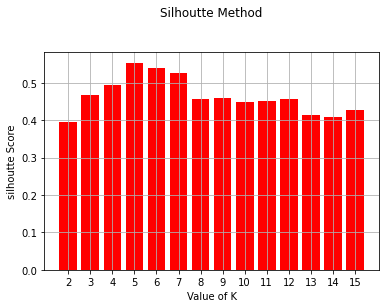

In [8]:
from sklearn.metrics import silhouette_score
silh=[]
for k in range (2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)  
    silh.append(score)

    
plt.title("Silhoutte Method\n\n")
plt.xlabel("Value of K")
plt.ylabel("silhoutte Score")
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='red')

In [9]:
#Evaluation Methods

km=KMeans(n_clusters=5,random_state=0)
labels=km.fit_predict(x)
cent=km.cluster_centers_       #centroid 

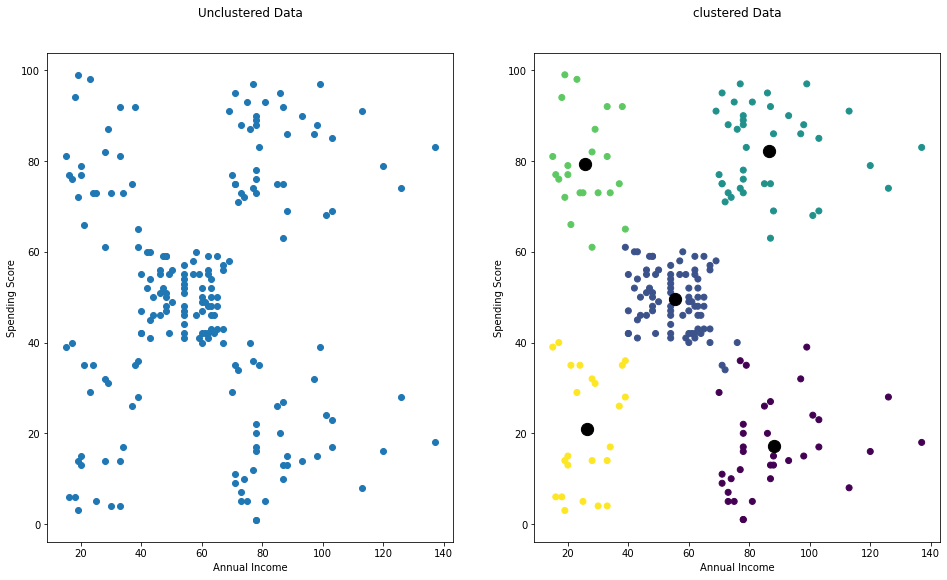

In [10]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Unclustered Data\n\n")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])


plt.subplot(1,2,2)
plt.title("clustered Data\n\n")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k')

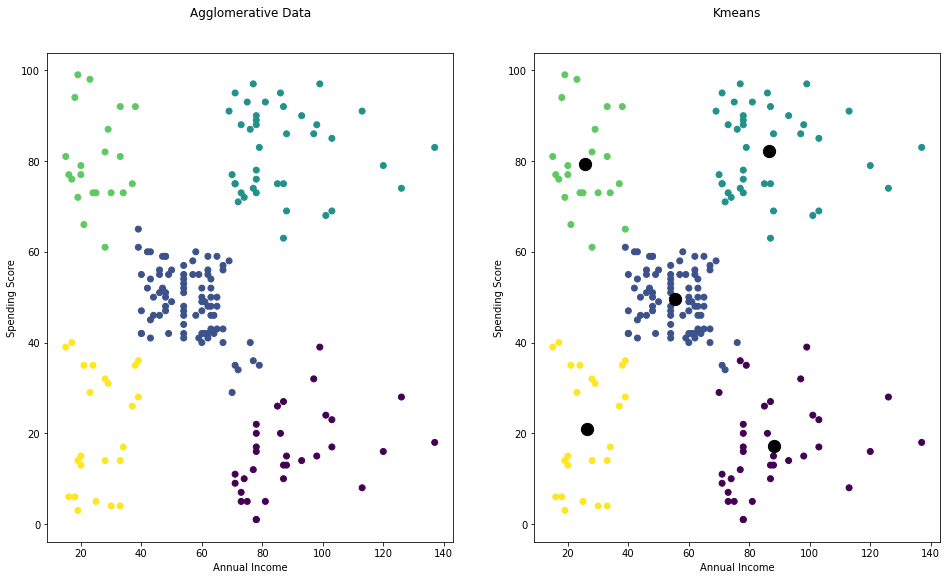

In [11]:
agl=AgglomerativeClustering(n_clusters=5)
alabels=agl.fit_predict(x)

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Agglomerative Data\n\n")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)


plt.subplot(1,2,2) 
plt.title("Kmeans\n\n")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k')